# 4. Classification
This notebook will be used to establish baseline models using the pre-processed dataset for later comparison against more advanced models and models using improvement techniques such as feature selection and hyperparameter tuning.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

sb.set() # set the default Seaborn style for graphics

## Import Preprocessed Data from the Data Processing step earlier.
Note: The preprocessed data are one-hot encoded for categorical variables and scaled for numerical variables (from Data Pre-Processing.ipynb)

In [2]:
# Read columns used to build models
columns = pd.read_csv('Data/basic_model_columns.csv')['Columns'].to_list()

In [3]:
X_train = pd.read_csv('Data/X_train_undersampled_data.csv')[columns]
X_test = pd.read_csv('Data/X_test.csv')[columns]
Y_train = pd.read_csv('Data/y_train_undersampled_data.csv')
Y_test = pd.read_csv('Data/y_test.csv')

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (20392, 1) (20392, 39)
Test Set  : (8176, 1) (8176, 39)


## Train basic classification models against current preprocessed dataset without any additional tuning (i.e. hyper parameter tuning, feature selection and etc). 


In [4]:
# Import all essential functions from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Set up a dataframe to store the results from different models
train_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
test_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

### Logistic Regression Classification Model

In [5]:
from sklearn.linear_model import LogisticRegression

logRegModel = LogisticRegression(max_iter=10000, random_state=47).fit(X_train, Y_train.values.ravel())

# Predict the output based on our training and testing dataset
Y_train_pred = logRegModel.predict(X_train)
Y_test_pred = logRegModel.predict(X_test)

#### Plot Confusion Matrix for Logistic Regression Model

Train and Test Data Confusion Matrix:


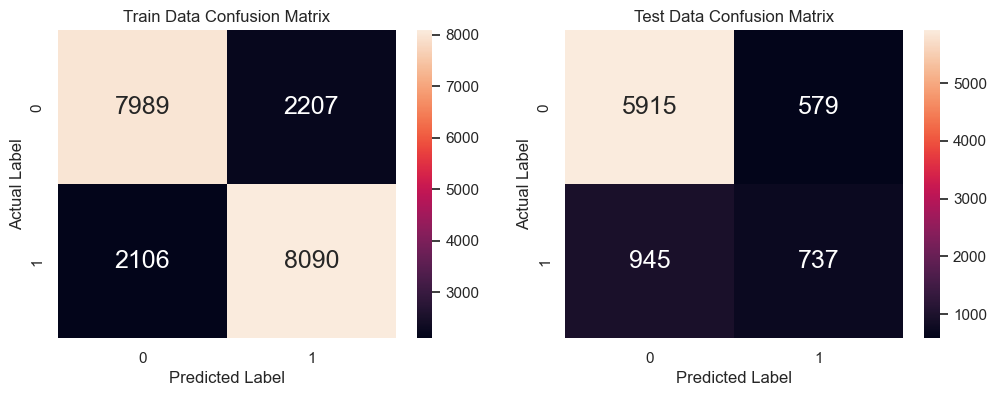

In [6]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Logistic Regression Model

In [7]:
train_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.788495488426834
Precision 	: 0.7856657278819074
Recall 		: 0.7934484111416241
F1 Score 	: 0.7895378909871663

**Test Set Metrics**
Accuracy 	: 0.8136007827788649
Precision 	: 0.5600303951367781
Recall 		: 0.43816884661117717
F1 Score 	: 0.4916611074049366


##### Insights based on metrics:
There is a decrease in precision, recall and f1 score from the training metrics to the test metrics despite the higher accuracy from training to test. This could suggest some underlying issues such as being able better predict one class over the other. If we look at the confusion matrix, we can actually see that in the test confusion matrix, it is a lot more reliable in predicting class 0 ("Not Canceled"), than class 1 ("Canceled") based on the high number of false positives.


### Decision Tree Classification Model

In [8]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [9]:
decisionTreeModel = DecisionTreeClassifier(random_state=47)
decisionTreeModel.fit(X_train, Y_train)

# Predict the output based on our training and testing dataset
Y_train_pred = decisionTreeModel.predict(X_train)
Y_test_pred = decisionTreeModel.predict(X_test)

#### Plot Confusion Matrix for Decision Tree Model

Train and Test Data Confusion Matrix:


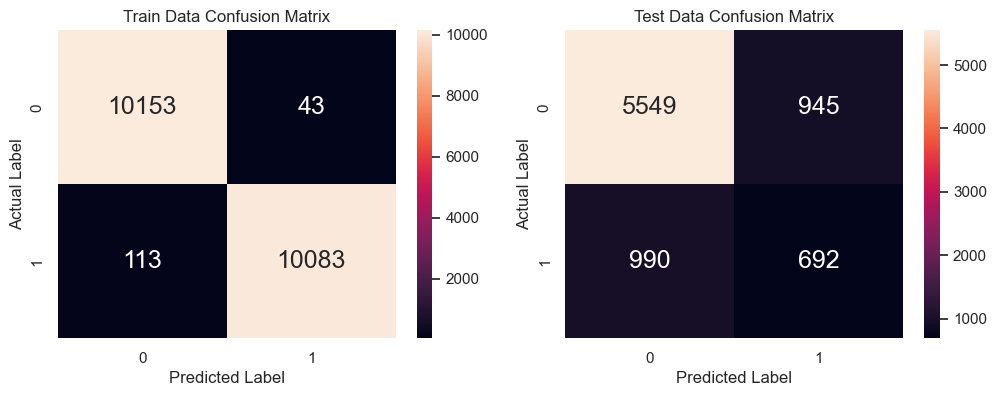

In [10]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Decision Tree Model

In [11]:
train_metric = {
    "Classification Model": "Decision Tree",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "Decision Tree",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.9923499411533935
Precision 	: 0.9957535058265851
Recall 		: 0.9889172224401727
F1 Score 	: 0.9923235901978152

**Test Set Metrics**
Accuracy 	: 0.7633317025440313
Precision 	: 0.42272449602932194
Recall 		: 0.4114149821640904
F1 Score 	: 0.41699307020186804


##### Insights based on metrics:
In the training metrics, we can see that accuracy, precision, recall and f1 score is close to 1. But however, if we look at the metrics on the testing dataset, we can see there is a sharp drop in almost all the 4 metrics (accuracy, precision, recall, f1 score). This could imply that the default decision tree model (without any tuning) is likely overfitting the training data, including the noise and outliers in the training dataset. Because of the potential overfitting, this means the data will not generalise as well to the testing dataset which it has not seen before.


### K-Nearest Neighbour Classification Model

In [12]:
# Import k nearest neighbour classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Default k nearest neighbour is n_neighbours = 5 (this can be further tuned in the future)
kNeighboursModel = KNeighborsClassifier()
kNeighboursModel.fit(X_train, Y_train.values.ravel())

# Predict the output based on our training and testing dataset
Y_train_pred = kNeighboursModel.predict(X_train)
Y_test_pred = kNeighboursModel.predict(X_test)

#### Plot Confusion Matrix for K-Nearest Neighbour Model

Train and Test Data Confusion Matrix:


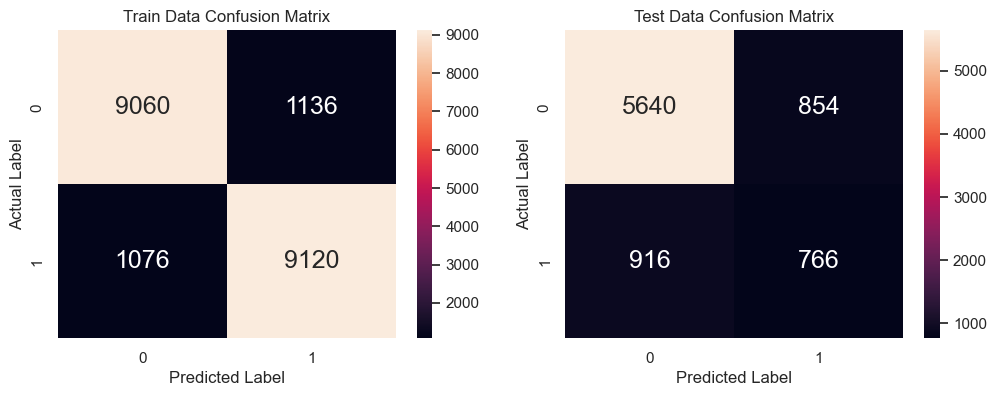

In [13]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for K-Nearest Neighbour Model

In [14]:
train_metric = {
    "Classification Model": "K-nearest Neighbour",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "K-nearest Neighbour",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.8915260886622205
Precision 	: 0.8892355694227769
Recall 		: 0.8944684189878384
F1 Score 	: 0.8918443184040681

**Test Set Metrics**
Accuracy 	: 0.7835127201565558
Precision 	: 0.4728395061728395
Recall 		: 0.45541022592152197
F1 Score 	: 0.4639612356147789


##### Insights based on metrics:
The model does not generalise well to new data, as shown by the decreased metrics in the test data. The default K number of neighbours of the model is 5 when we don't input a specify K number, and this could actually result in overfitting due to the small numbers of neighbours and making the model more sensitive to noise/outliers.

In addition, our dataset has quite a number of features and K-NN performance is not very good for high dimensional data due to the calculation of distances when there are too many features, the distance between data points will seem to be closer.

### Linear Support Vector Machine (SVM) Classification Model

In [15]:
# Import SVM from Sklearn
from sklearn.svm import SVC

svmModel = SVC(kernel="linear", random_state=47)
svmModel.fit(X_train, Y_train.values.ravel())

# Predict the output based on our training and testing dataset
Y_train_pred = svmModel.predict(X_train)
Y_test_pred = svmModel.predict(X_test)

#### Plot Confusion Matrix for Linear Support Vector Machine (SVM) Model

Train and Test Data Confusion Matrix:


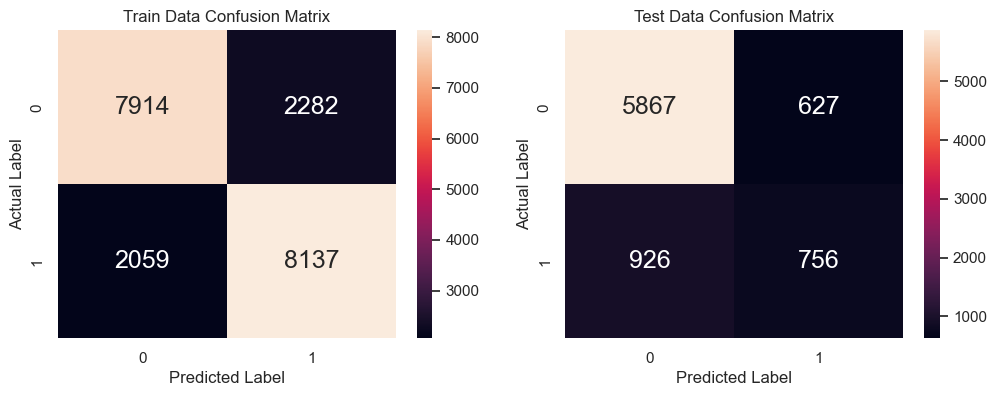

In [16]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Linear Support Vector Machine (SVM) Model

In [17]:
train_metric = {
    "Classification Model": "Support Vector Machine",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "Support Vector Machine",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.7871224009415457
Precision 	: 0.780977061138305
Recall 		: 0.7980580619850922
F1 Score 	: 0.7894251758428329

**Test Set Metrics**
Accuracy 	: 0.8100538160469667
Precision 	: 0.5466377440347071
Recall 		: 0.44946492271105826
F1 Score 	: 0.49331158238172923


##### Insights based on metrics:
Similar to the logistic regression model, the accuracy improves from the training set to the test set, but precision, recall and f1 score is much lower. One possible theory about this is because the SVM is trained with the kernel=linear parameter, which means its possible that the data is not very linearly seperable. In addition, in the confusion matrix for the test data, we can clearly see that it is able to predict class 0 ("Not canceled") very well, but class 1 ("Canceled") not as well as shown by the high false positive counts.

### Naive Bayes (Gaussian) Classification Model

Given the nature of our dataset which consist of mixed data types such as numerical features and one hot encoded values, there is no one best fit naive bayes model (Guassian, Bernoulli, Multinomial), but let's try GaussianNB given the scaled numerical features we have.

In [18]:
# Import Gaussian Naive Bayes Classifier from Sklearn
from sklearn.naive_bayes import GaussianNB

gaussianNBModel = GaussianNB()
gaussianNBModel.fit(X_train, Y_train.values.ravel())

# Predict the output based on our training and testing dataset
Y_train_pred = gaussianNBModel.predict(X_train)
Y_test_pred = gaussianNBModel.predict(X_test)

#### Plot Confusion Matrix for Naive Bayes (Gaussian) Model

Train and Test Data Confusion Matrix:


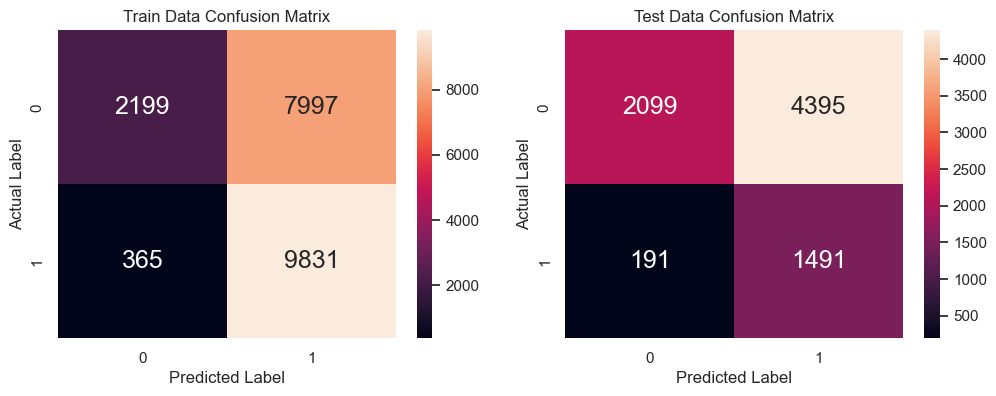

In [19]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Naive Bayes (Gaussian) Model

In [20]:
train_metric = {
    "Classification Model": "Gaussian Naive Bayes",
    "Accuracy": accuracy_score(Y_train, Y_train_pred),
    "Precision": precision_score(Y_train, Y_train_pred),
    "Recall": recall_score(Y_train, Y_train_pred),
    "F1 Score": f1_score(Y_train, Y_train_pred)
}

test_metric = {
    "Classification Model": "Gaussian Naive Bayes",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.5899372302863868
Precision 	: 0.5514359434597262
Recall 		: 0.9642016477049824
F1 Score 	: 0.7016129032258065

**Test Set Metrics**
Accuracy 	: 0.43909001956947163
Precision 	: 0.2533129459734964
Recall 		: 0.8864447086801427
F1 Score 	: 0.39402748414376315


##### Insights based on metrics:
For both train and test metrics, the accuracy is lesser than 55%, which means only 45% of data are incorrectly predicted, indicating that the trained model used is not good for predicting the given output. In addition, another interesting insight is the extremely low precision but high recall, indicating that out of all the actual positives, it was able to predict the positive correctly. But out of teh total positives predicted, a low amount is actually positive.

### Comparing the Different Classification Models

In [21]:
# train_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
# train_metrics

In [22]:
# ax = sb.barplot(x="Accuracy", y="Classification Model", data=train_metrics)

In [23]:
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
4,Gaussian Naive Bayes,0.439090,0.253313,0.886445,0.394027
1,Decision Tree,0.763332,0.422724,0.411415,0.416993
2,K-nearest Neighbour,0.783513,0.472840,0.455410,0.463961
3,Support Vector Machine,0.810054,0.546638,0.449465,0.493312
0,Logistic Regression,0.813601,0.560030,0.438169,0.491661


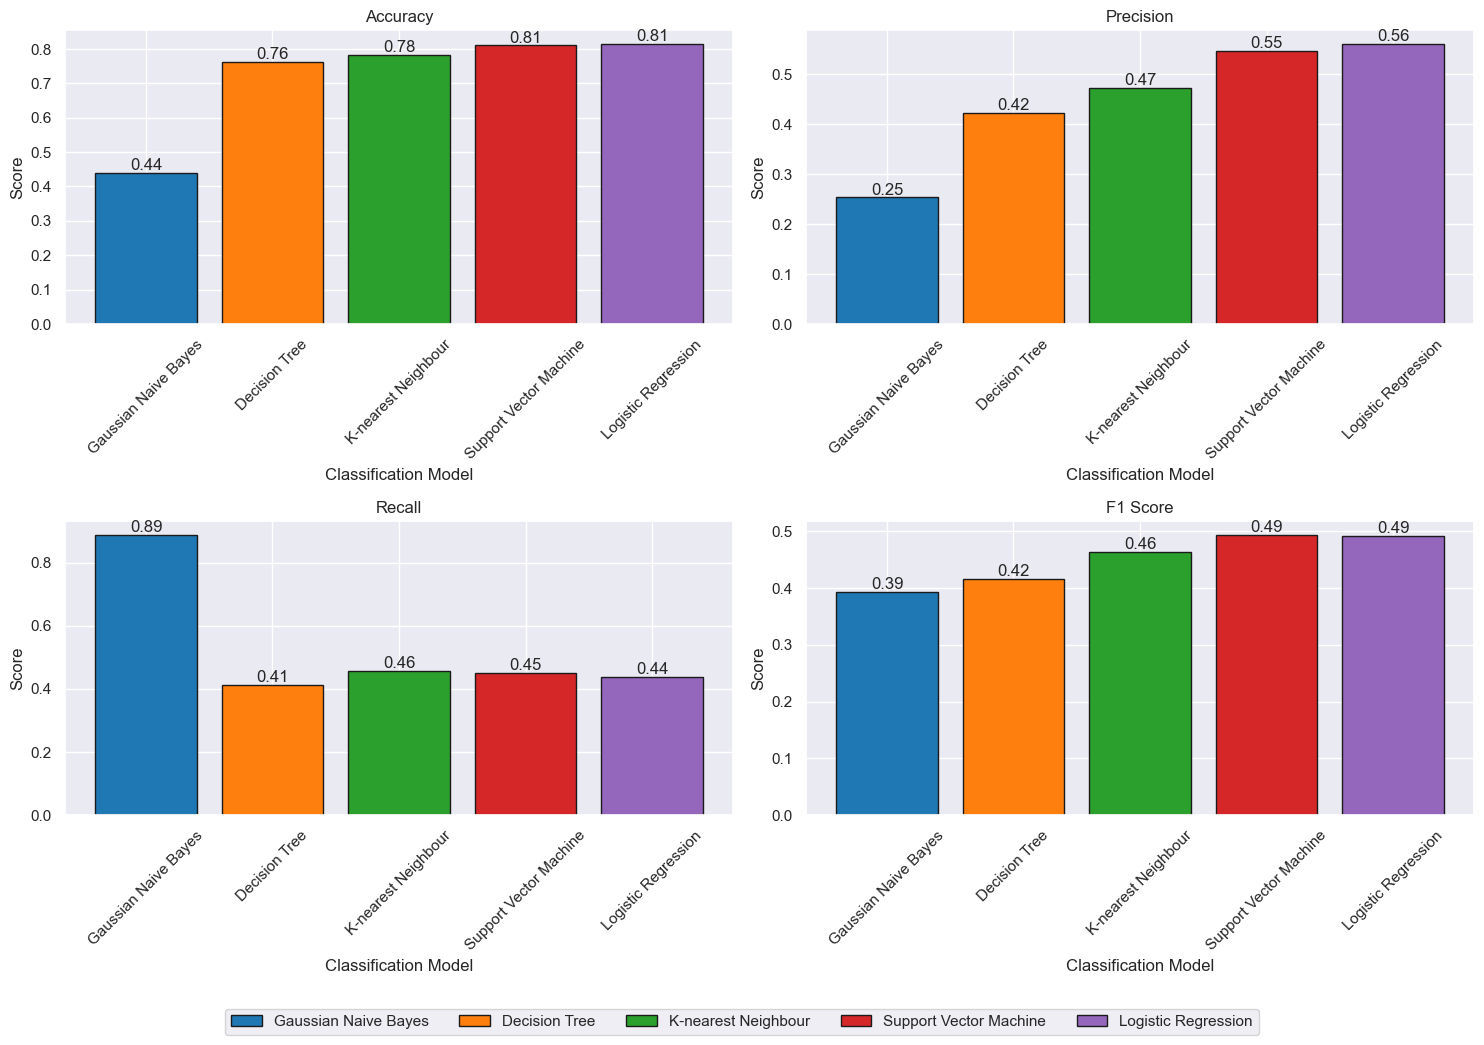

In [25]:
from Utils import plotMetricsGraphComparison # Custom plotting method to compare metrics between models
plotMetricsGraphComparison(test_metrics)

#### Insights From Comparing the Different Models
1. The two best models based on Accuracy is Logistic Regression and Support Vector Machine, both with an accuracy of 0.81. In addition, we can actually see that the two of them have similar precision, recall and f1 score as well.

2. However, it appears the the logistic regression and SVM model have the lowest recall score, which is how the model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. Recall is calculated by True Positive / (True Positive + False Negative), a low recall score would imply that we have a lot of false negative, which means we predicted the customer to not cancel the hotel booking, but the actual label is the customer canceled the booking. Recall is very important in our use case, especially since the goal of the project is that we want to find out the customers who will be canceling the booking, as this insight will allow the hotel management to prepare in advance to minimise any disruptions, hence it is crucial to reduce the false negative rate.

3. Gaussian Naive Bayes appears to be a bad model for our use case and the given dataset. This is likely due to the mixed data attributes used such as both categorical and numberical data. 

### Next Steps:
The goal here is to improve on the classification performance, the below are some identified steps that we will perform to try to improve the current results of the basic classification models we have trained above.

- Additional Feature Engineering and Feature Selection
- Making use of ensembling (bagging and boosting) techniques to improve the classification performance
- Hyperparameter Tuning

First we will perform Feature Engineering to create more features before the feature selection step.

## To Navigate To The Next Notebook:
0. [Introduction](/0%20-%20Introduction.ipynb) 
1. [Data Cleaning Notebook](/1%20-%20Data%20Cleaning.ipynb) 
2. [Exploratory Data Analyis Notebook](/2%20-%20Data%20Exploration.ipynb)
3. [Data Pre-processing Notebook](/3%20-%20Data%20Pre-Processing.ipynb)
4. [Initial Classification Models Notebook](/4%20-%20ClassificationModels.ipynb) - <b>[You Are Here Now]</b>
5. [Feature Engineering Notebook](/5%20-%20Feature%20Engineering.ipynb)
6. Applying Feature Selection + Hyperparameter Tuning On Individual Models
   1. [Logistic Regression Notebook](/6.1%20-%20Logistic%20Regression.ipynb)
   2. [K Nearest Neighbour Notebook](/6.2%20-%20K%20Nearest%20Neighbour.ipynb)
   3. [Decision Tree Notebook](/6.3%20-%20Decision%20Tree.ipynb)
   4. [Support Vector Machine Notebook](/6.4%20-%20SVM.ipynb)
   5. [Random Forest Notebook](/6.5%20-%20Random%20Forest.ipynb)
   6. [Adaboost Notebook](/6.6%20-%20Adaboost.ipynb)
   7. [Gradient Boost Notebook](/6.7%20-%20Gradient%20Boosting.ipynb)
   8. [LightGBM Notebook](/6.8%20-%20LightGBM.ipynb)
7.  [Final Model Comparisons + Conclusion Notebook](/7%20-%20Model%20Comparison,%20Final%20Model%20and%20Conclusion.ipynb)